**Imports**

In [3]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import numpy as np
import torch
import time

from libtransmul import compute_transmul_cpp, compute_transmul_cython

torch.manual_seed(42)

**General functions**

In [4]:
#Generating random function
def generate_random_matrix(size):
    return np.random.rand(size, size)

In [5]:
#Measuring time of a function
def measure_time(func, *args):
    start_time = time.time()
    result = func(*args)
    end_time = time.time()
    return end_time - start_time, result

In [6]:
def numpy_to_FloatMatrix(np_array):
    return [[float(x) for x in row] for row in np_array]

In [7]:
def numpy_function(A, B):
    result = np.dot(A, B)
    result_transposed = np.transpose(result)
    return result_transposed

**Testing the functions**

In [8]:
A = np.array([[1.0, 2.0], [3.0, 4.0]], dtype=np.float32)
B = np.array([[5.0, 6.0], [7.0, 8.0]], dtype=np.float32)

A_list = numpy_to_FloatMatrix(A)
B_list = numpy_to_FloatMatrix(B)

In [9]:
numpy_function(A, B)

array([[19., 43.],
       [22., 50.]], dtype=float32)

In [10]:
# Testing compute_transmul_cpp
result_cpp = compute_transmul_cpp(A_list, B_list)
print("Result from C++ function wrapped by Cython:")
print(np.array(result_cpp))

Result from C++ function wrapped by Cython:
[[19. 43.]
 [22. 50.]]


In [11]:
# Testing compute_transmul_cython
result_cython = compute_transmul_cython(A, B)
print("Result from Cython function:")
print(np.array(result_cython))

Result from Cython function:
[[19. 43.]
 [22. 50.]]


**First comparisons with numpy**

In [12]:
sizes = [100, 200, 500, 1000]
cpp_times_mult = []
numpy_times_mult = []
cython_times_mult = []

In [13]:
dims = [2**i for i in range(15)]


cpp_times = []
cython_times = []
numpy_times = []

# Loop through each matrix dimension
for dim in dims:
    # Generate random matrices of the specified dimension
    A = np.random.rand(dim, dim).astype(np.float32)
    B = np.random.rand(dim, dim).astype(np.float32)
    A_list = numpy_to_FloatMatrix(A)
    B_list = numpy_to_FloatMatrix(B)

    # Measure time for C++ function wrapped by Cython
    start_time = time.time()
    result_cpp = compute_transmul_cpp(A_list, B_list)
    end_time = time.time()
    cpp_times.append(end_time - start_time)

    # Measure time for Cython function
    start_time = time.time()
    result_cython = compute_transmul_cython(A, B)
    end_time = time.time()
    cython_times.append(end_time - start_time)

    # Measure time for NumPy function
    start_time = time.time()
    result_numpy = np.dot(A, B)
    end_time = time.time()
    numpy_times.append(end_time - start_time)

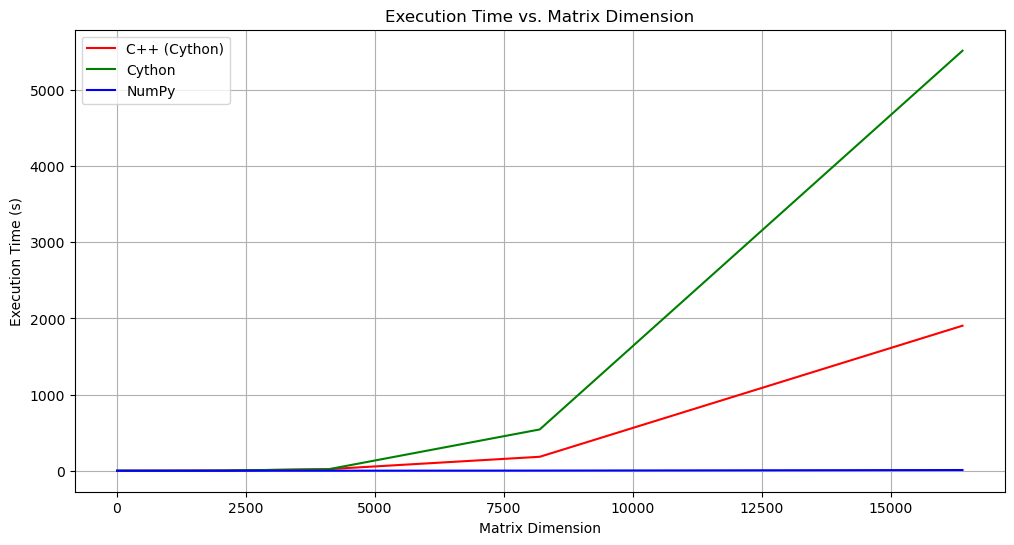

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(dims, cpp_times, label='C++ (Cython)', color='r')
plt.plot(dims, cython_times, label='Cython', color='g')
plt.plot(dims, numpy_times, label='NumPy', color='b')
plt.xlabel('Matrix Dimension')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs. Matrix Dimension')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
print("Average time taken by C++ function wrapped by Cython:", avg_cpp_time)
print("Average time taken by Cython function:", avg_cython_time)
print("Average time taken by NumPy function:", avg_numpy_time)

# Plotting the execution times
labels = ['C++ (Cython)', 'Cython', 'NumPy']
avg_times = [avg_cpp_time, avg_cython_time, avg_numpy_time]

plt.bar(labels, avg_times, color=['red', 'green', 'blue'])
plt.ylabel('Average Execution Time (s)')
plt.title('Comparison of Execution Times')
plt.show()

NameError: name 'avg_cpp_time' is not defined

**Comparing with PyTorch**